# Data Process and Visualization

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, ttest_ind
import warnings
warnings.filterwarnings("ignore")

In [25]:
df = pd.read_csv('/content/crime_vs_socioeconomic_factors.csv')

df.head()

,Region,Crime_Rate,Education_Level,Employment_Rate,Median_Income,Poverty_Rate,Population_Density
0,Region_1,1176,76.492001,73.315344,116664,14.655300,1523
1,Region_2,910,85.361505,46.088096,21401,19.712623,3293
2,Region_3,1344,88.388975,63.911701,105179,9.634319,4528
3,Region_4,1180,54.364509,65.305378,35193,19.994283,2231
4,Region_5,1145,75.305198,51.627568,112389,26.537843,1499


In [26]:
if 'Unemployment_Rate' not in df.columns and 'Employment_Rate' in df.columns:
    df['Unemployment_Rate'] = 100 - df['Employment_Rate']

In [27]:
# Selected features
df['Income_to_Poverty_Ratio'] = df['Median_Income'] / df['Poverty_Rate']

features = [
    'Crime_Rate',
    'Education_Level',
    'Unemployment_Rate',
    'Median_Income',
    'Poverty_Rate',
    'Income_to_Poverty_Ratio'
]

data = df[features].copy()


In [28]:
# Add a log-transformed version of crime rate (enrichment)
data['Log_Crime_Rate'] = np.log(data['Crime_Rate'] + 1)  # add 1 to avoid log(0)

In [29]:
desc_stats = data.describe().T
desc_stats['median'] = data.median()
desc_stats['mode'] = data.mode().iloc[0]

print("Descriptive Statistics:")
display(desc_stats)

Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max,median,mode
Crime_Rate,1000.0,802.428000,418.186261,50.000000,452.750000,818.500000,1159.000000,1495.000000,818.500000,1172.000000
Education_Level,1000.0,75.391052,14.120708,50.011876,63.229627,76.140098,87.409706,99.967675,76.140098,50.011876
Unemployment_Rate,1000.0,35.179120,14.652422,10.014310,22.518910,34.965399,48.368900,59.990580,34.965399,10.014310
Median_Income,1000.0,69427.926000,29219.031581,20112.000000,44347.000000,67484.000000,96258.250000,119977.000000,67484.000000,21920.000000
Poverty_Rate,1000.0,17.465860,7.226494,5.004663,11.237297,17.550832,23.859603,29.940571,17.550832,5.004663
Income_to_Poverty_Ratio,1000.0,5035.650226,3642.186538,713.155144,2432.851953,3973.093825,6530.232608,22244.728509,3973.093825,713.155144
Log_Crime_Rate,1000.0,6.469734,0.773958,3.931826,6.117546,6.708694,7.056175,7.310550,6.708694,7.067320


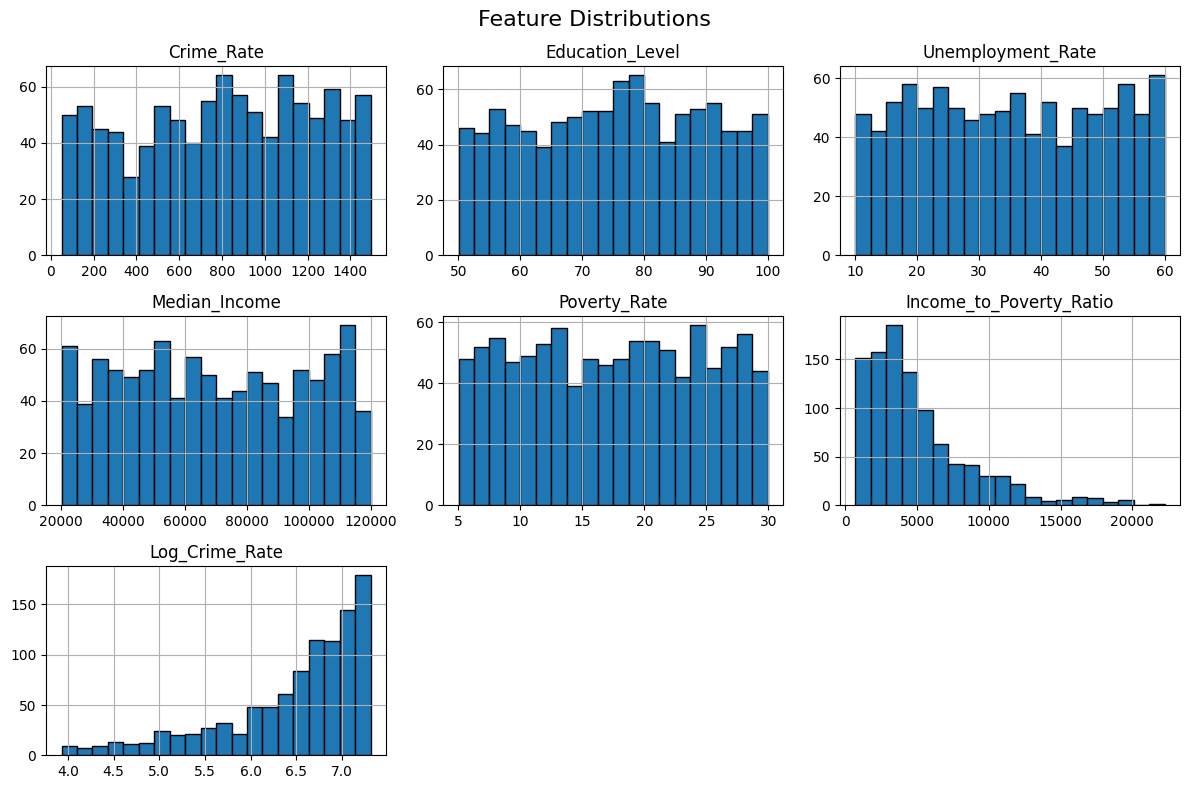

In [30]:
data.hist(bins=20, figsize=(12, 8), edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

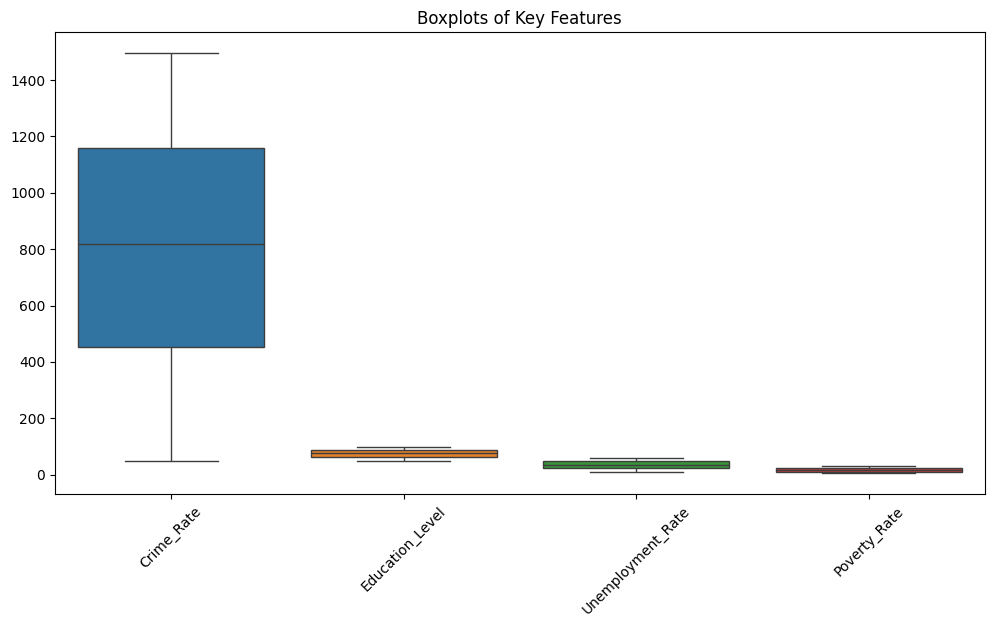

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['Crime_Rate', 'Education_Level', 'Unemployment_Rate', 'Poverty_Rate']])
plt.title("Boxplots of Key Features")
plt.xticks(rotation=45)
plt.show()

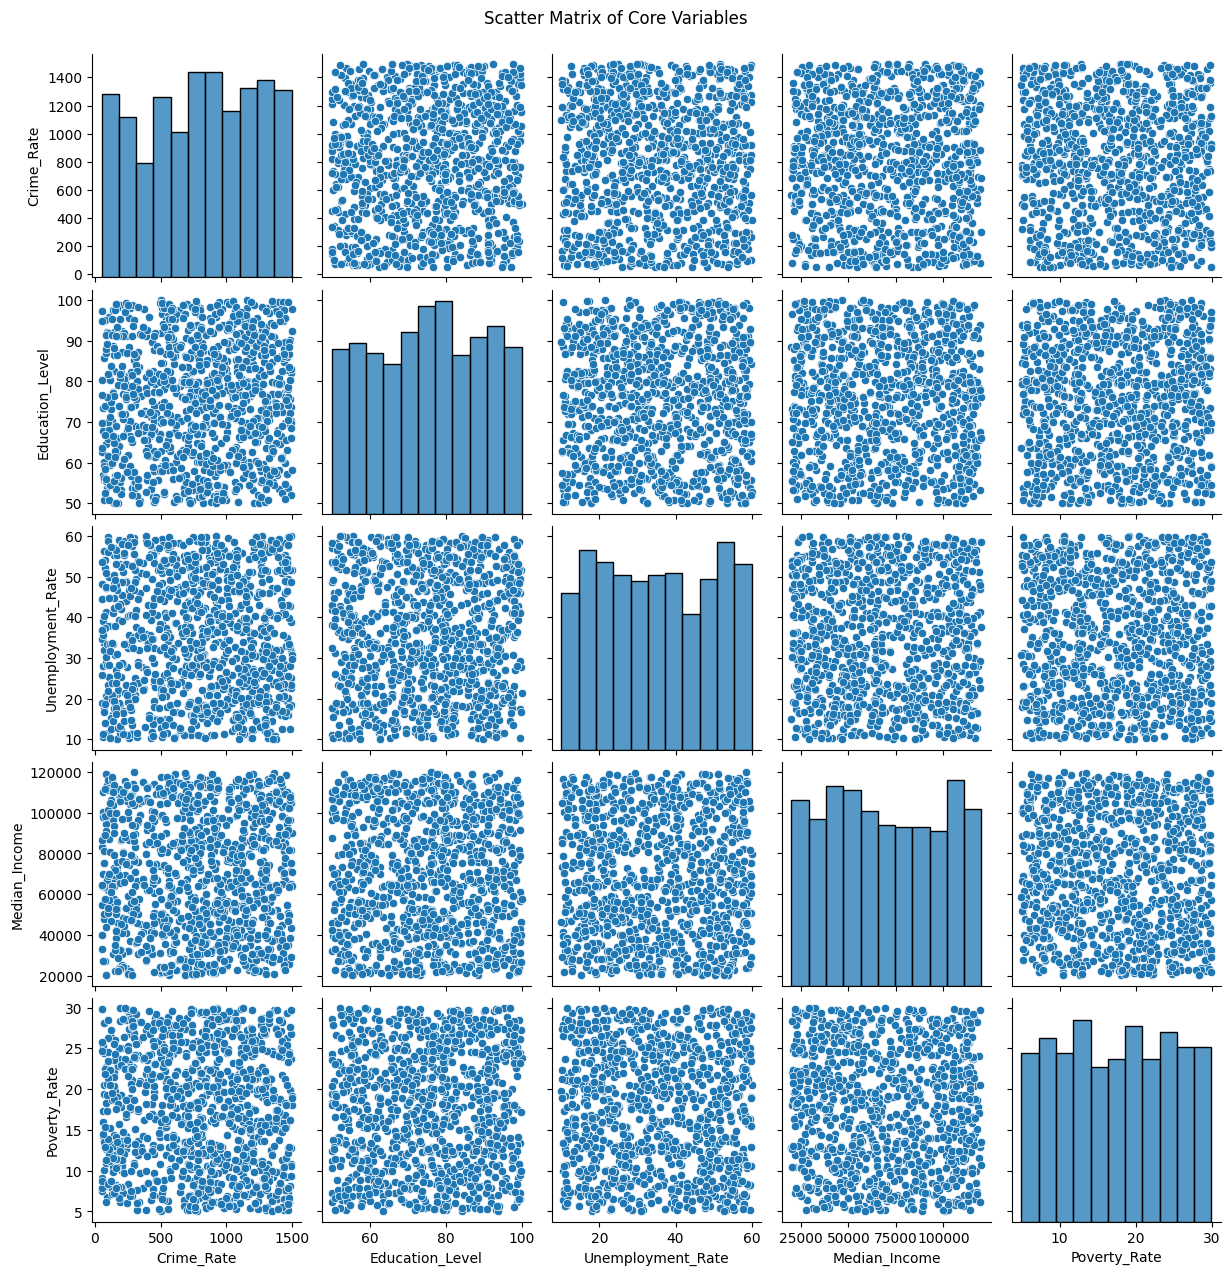

In [32]:
sns.pairplot(data[['Crime_Rate', 'Education_Level', 'Unemployment_Rate', 'Median_Income', 'Poverty_Rate']])
plt.suptitle("Scatter Matrix of Core Variables", y=1.02)
plt.show()

In [33]:
corr, p_val = pearsonr(data['Unemployment_Rate'], data['Crime_Rate'])
print(f'Unemployment vs Crime: Correlation = {corr:.2f}, p = {p_val:.4f}')

Unemployment vs Crime: Correlation = -0.00, p = 0.8923


# Hypothesis Tests

In [34]:
corr, p_val = pearsonr(data['Median_Income'], data['Crime_Rate'])
print(f"Pearson Correlation (Income vs Crime): {corr:.2f}, p-value: {p_val:.4f}")
print("Significant" if p_val < 0.05 else "Not significant")

Pearson Correlation (Income vs Crime): 0.01, p-value: 0.8067
Not significant


In [35]:
corr, p_val = pearsonr(data['Education_Level'], data['Crime_Rate'])
print(f"Pearson Correlation (Education vs Crime): {corr:.2f}, p-value: {p_val:.4f}")
print("Significant" if p_val < 0.05 else "Not significant")

Pearson Correlation (Education vs Crime): 0.06, p-value: 0.0565
Not significant


In [36]:
threshold = data['Poverty_Rate'].median()
high_poverty = data[data['Poverty_Rate'] >= threshold]['Crime_Rate']
low_poverty = data[data['Poverty_Rate'] < threshold]['Crime_Rate']

t_stat, p_val = ttest_ind(high_poverty, low_poverty)
print(f"T-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")
print("Significant difference between high and low poverty regions" if p_val < 0.05 else "No significant difference")

T-statistic: -1.41, p-value: 0.1597
No significant difference


#Machine Learning

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Education_Level', 'Employment_Rate', 'Median_Income', 'Poverty_Rate', 'Population_Density']]
y = df['Crime_Rate']

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.neighbors import KNeighborsRegressor

#KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)

knn_rmse = np.sqrt(mean_squared_error(y_test, knn_preds))
knn_r2 = r2_score(y_test, knn_preds)

print(f"KNN RMSE: {knn_rmse:.2f}")
print(f"KNN R2: {knn_r2:.2f}")

KNN RMSE: 481.26
KNN R2: -0.29


In [40]:
#Random forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_preds)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_preds)

print(f'Random Forest RMSE: {rf_rmse:.2f}')
print(f'Random Forest R2: {rf_r2:.2f}')

Random Forest RMSE: 446.69
Random Forest R2: -0.11


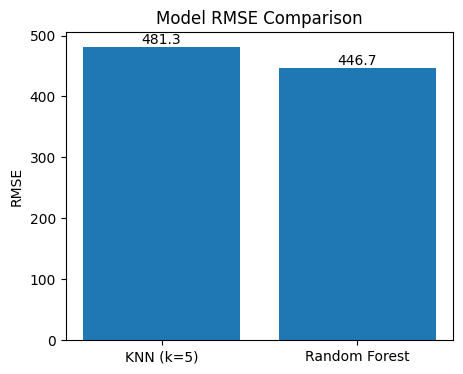

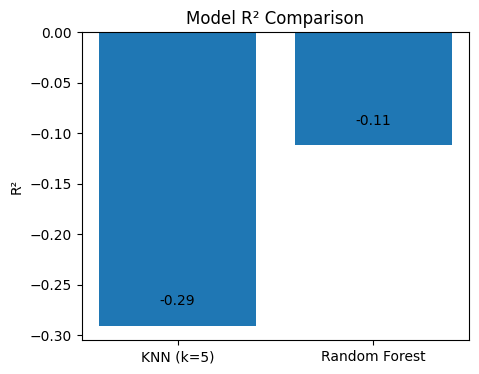

In [45]:
models = ['KNN (k=5)', 'Random Forest']
rmse_values = [knn_rmse, rf_rmse]
r2_values   = [knn_r2,  rf_r2]

plt.figure(figsize=(5, 4))
plt.bar(models, rmse_values)
plt.title('Model RMSE Comparison')
plt.ylabel('RMSE')
for idx, val in enumerate(rmse_values):
    plt.text(idx, val + 5, f'{val:.1f}', ha='center')
plt.show()

plt.figure(figsize=(5, 4))
plt.bar(models, r2_values)
plt.title('Model R² Comparison')
plt.ylabel('R²')
for idx, val in enumerate(r2_values):
    plt.text(idx, val + 0.02, f'{val:.2f}', ha='center')
plt.show()